In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import scipy.stats
import math

In [68]:
df = pd.read_table("geyser.txt", sep="\s+", usecols = ["eruption", "waiting"])
df

,eruption,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


In [69]:
np_data = df.to_numpy() #convert df to np array

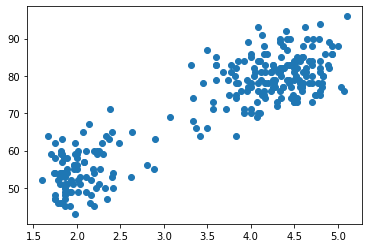

In [70]:
eruption = [np_data[i][0] for i in range(len(np_data))] #np array of eruption times
waiting = [np_data[i][1] for i in range(len(np_data))] #np array of waiting times
plt.scatter(eruption, waiting)

# Iterations:  13


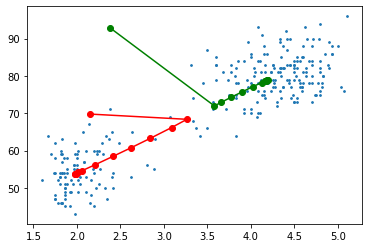

In [75]:
#(c) EM Algo

def elliptical_gaussian(mus, sigs, vals):
    denom = 2*math.pi*sigs[0]*sigs[1]
    exp1 = ((vals[0] - mus[0])**2)/(2*sigs[0]**2)
    exp2 = (vals[1] - mus[1])**2/(2*sigs[1]**2)
    return math.exp(- exp1 - exp2)/denom
    
#find gamma for a data point i
def gamma(mu1, mu2, sig1, sig2, pi, i):
    p1 = elliptical_gaussian(mu1, sig1, (eruption[i], waiting[i]))
    p2 = elliptical_gaussian(mu2, sig2, (eruption[i], waiting[i]))
    return (pi*p1)/(pi*p1 + (1-pi)*p2)

def mu1_sum(gammas):
    erup = 0
    wait = 0
    gam = 0
    for i in range(len(df)):
        erup += gammas[i]*eruption[i]
        wait += gammas[i]*waiting[i]
        gam += gammas[i]
    return (erup/gam, wait/gam)
    
def mu2_sum(gammas):
    erup = 0
    wait = 0
    gam = 0
    for i in range(len(df)):
        erup += (1 - gammas[i])*eruption[i]
        wait += (1 - gammas[i])*waiting[i]
        gam += 1 - gammas[i]
    return (erup/gam, wait/gam)

def sig1_sum(gammas, mu1, mu2):
    erup = 0
    wait = 0
    gam = 0
    for i in range(len(df)):
        erup += gammas[i]*(eruption[i] - mu1[0])**2
        wait += gammas[i]*(waiting[i] - mu1[1])**2
        gam += gammas[i]
    erup = math.sqrt(erup/gam)
    wait = math.sqrt(wait/gam)
    return (erup, wait)

def sig2_sum(gammas, mu1, mu2):
    erup = 0
    wait = 0
    gam = 0
    for i in range(len(df)):
        erup += (1 - gammas[i])*(eruption[i] - mu1[0])**2
        wait += (1 - gammas[i])*(waiting[i] - mu1[1])**2
        gam += 1 - gammas[i]
    erup = math.sqrt(erup/gam)
    wait = math.sqrt(wait/gam)
    return (erup, wait)

def pi_sum(gammas):
    pi = 0
    for i in range(len(df)):
        pi += gammas[i]
    return pi/len(gammas)

def EM(mu1, mu2, sig1, sig2, pi): #takes in initial values

    #EM algo
    TC = False #termination criteria
    iterations = 0
    mu1s = [mu1]
    mu2s = [mu2]
    pis = [pi]
    
    

    while TC == False:

        # E-step:
        gammas = []
        for j in range(len(df)):
            gammas.append(gamma(mu1, mu2, sig1, sig2, pi, j))

        # M-step:
        mu1 = mu1_sum(gammas)
        mu2 = mu2_sum(gammas)
        sig1 = sig1_sum(gammas, mu1, mu2)
        sig2 = sig2_sum(gammas, mu1, mu2)

        last_pi = pi
        pi = pi_sum(gammas)

        #store info about this iteration:
        mu1s.append(mu1)
        mu2s.append(mu2)
        pis.append(pi)
        
        


        # evaluate termination criteria:
        # terminate if we reach the 100th iteration or if pi changes very little
        iterations += 1

        if iterations == 100:
            TC = True

        if abs(pi - last_pi) <= 0.001:
            TC = True
    
    return [mu1s, mu2s, pis, iterations]


#randomly initialize gaussian features
rand_erup1 = random.uniform(np.amin(eruption), np.amax(eruption))
rand_erup2 = random.uniform(np.amin(eruption), np.amax(eruption))

rand_wait1 = random.uniform(np.amin(waiting), np.amax(waiting))
rand_wait2 = random.uniform(np.amin(waiting), np.amax(waiting))
    
mu1 = (rand_erup1, rand_wait1)
mu2 = (rand_erup2, rand_wait2)

sig1 = (random.uniform(2, 5), random.uniform(20, 100))
sig2 = (random.uniform(2, 5), random.uniform(20, 100))

pi = random.random()

run = EM(mu1, mu2, sig1, sig2, pi)  
mu1s = run[0]
mu2s = run[1]
pis = run[2]
iterations = run[3]


#plot mean vectors:

it_list = np.array(range(iterations + 1))
print("# Iterations: ", iterations)

mu1s_erup = np.array([mu1s[i][0] for i in range(len(mu1s))])
mu1s_wait = np.array([mu1s[i][1] for i in range(len(mu1s))])
mu2s_erup = np.array([mu2s[i][0] for i in range(len(mu2s))])
mu2s_wait = np.array([mu2s[i][1] for i in range(len(mu2s))])

plt.scatter(eruption, waiting, s = 3)
plt.scatter(mu1s_erup, mu1s_wait, c = "r")
plt.plot(mu1s_erup, mu1s_wait, c = "r")
plt.scatter(mu2s_erup, mu2s_wait, c = "g")
plt.plot(mu2s_erup, mu2s_wait, c = "g")



Avg #Iterations: 9.16


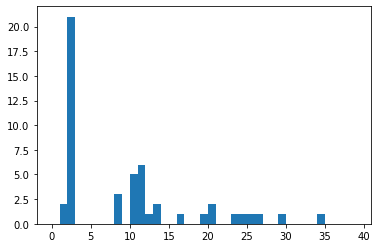

In [76]:
# run EM algo 50 times with random initial values

def fifty():
    
    x=0
    iterations = []
    while x < 50:
        
        #randomly initialize gaussian features
        rand_erup1 = random.uniform(np.amin(eruption), np.amax(eruption))
        rand_erup2 = random.uniform(np.amin(eruption), np.amax(eruption))

        rand_wait1 = random.uniform(np.amin(waiting), np.amax(waiting))
        rand_wait2 = random.uniform(np.amin(waiting), np.amax(waiting))

        mu1 = (rand_erup1, rand_wait1)
        mu2 = (rand_erup2, rand_wait2)

        sig1 = (random.uniform(2, 5), random.uniform(20, 100))
        sig2 = (random.uniform(2, 5), random.uniform(20, 100))

        pi = random.random()
        
        x += 1
        num = EM(mu1, mu2, sig1, sig2, pi)[-1]
        iterations.append(num)
    
    return iterations

dist = fifty()
bins_list = [i for i in range(40)]
plt.hist(dist, bins = bins_list)
print("Avg #Iterations:", sum(dist)/50)


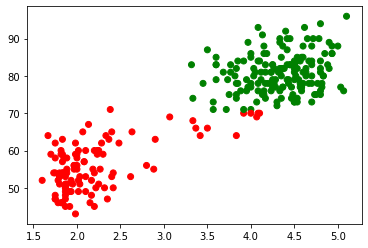

In [77]:
#part d

#k-means:

def k_means():
    
    n = len(df)
    
    #initial cluster assignments (random):
    assignment = []
    for i in range(n):
        if random.random() > 0.5:
            assignment.append(1)
        else:
            assignment.append(0)
    
    TC = False
    iterations = 0
    while TC == False:
        iterations += 1
        
        
        #compute cluster centers:
        c0_erup = 0
        c0_wait = 0
        n0 = 0
        c1_erup = 0
        c1_wait = 0
        n1 = 0
        for i in range(n):
            #cluster 0
            if assignment[i] == 0:
                n0 += 1
                c0_erup += eruption[i]
                c0_wait += waiting[i]

            #cluster 1
            elif assignment[i] == 1:
                n1 += 1
                c1_erup += eruption[i]
                c1_wait += waiting[i]

            else:
                print("Error: nonbinary val in assignment")

        c0_erup = c0_erup/n0
        c0_wait = c0_wait/n0
        c1_erup = c1_erup/n1
        c1_wait = c1_wait/n1
       
        last_assignment = assignment
        
        #reassign each point to its nearest cluster center:
        for i in range(n):
            
            #find distances to cluster centers
            c0_dist = math.sqrt( (c0_erup - eruption[i])**2 + (c0_wait - waiting[i])**2 )
            c1_dist = math.sqrt( (c1_erup - eruption[i])**2 + (c1_wait - waiting[i])**2 )
            
            #assign to closest cluster
            if c0_dist > c1_dist:
                assignment[i] = 1
                
            elif c0_dist < c1_dist:
                assignment[i] = 0
            
            #if the distances are equivalent, the assignment remains the same
        
        #terminate if there is no change:
        TC = last_assignment == assignment
        
    return (assignment, iterations)

#make a scatterplot color-coded by cluster
km = k_means()
clusters = km[0]
iterations = km[1]
colors = []
for item in clusters:
    if item == 1:
        colors.append('r')
    else:
        colors.append('g')

plt.scatter(eruption, waiting, color = colors)


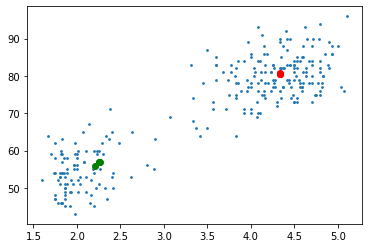

In [78]:
# Estimate mean and variance using MLE on labeled data points

km = k_means()
clusters = km[0]

mu1 = mu1_sum(clusters)
mu2 = mu2_sum(clusters)

sig1 = sig1_sum(clusters, mu1, mu2)
sig2 = sig2_sum(clusters, mu1, mu2)

pi = pi_sum(clusters)

# Do EM with these initial params:
e_max = EM(mu1, mu2, sig1, sig2, pi)
mu1s = e_max[0]
mu2s = e_max[1]
pis = e_max[2]
iterations = e_max[3]

it_list = np.array(range(iterations + 1))
mu1s_erup = np.array([mu1s[i][0] for i in range(len(mu1s))])
mu1s_wait = np.array([mu1s[i][1] for i in range(len(mu1s))])
mu2s_erup = np.array([mu2s[i][0] for i in range(len(mu2s))])
mu2s_wait = np.array([mu2s[i][1] for i in range(len(mu2s))])

plt.scatter(eruption, waiting, s = 3)
plt.scatter(mu1s_erup, mu1s_wait, c = "r")
plt.plot(mu1s_erup, mu1s_wait, c = "r")
plt.scatter(mu2s_erup, mu2s_wait, c = "g")
plt.plot(mu2s_erup, mu2s_wait, c = "g")

Avg # EM Iterations: 5.26


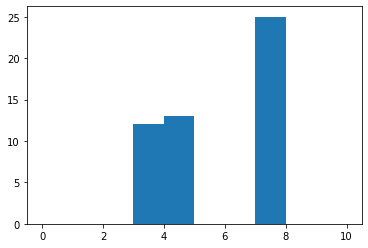

In [79]:
def km_fifty():
    
    x=0
    iterations = []
    while x < 50:
        
        km = k_means()
        clusters = km[0]

        mu1 = mu1_sum(clusters)
        mu2 = mu2_sum(clusters)

        sig1 = sig1_sum(clusters, mu1, mu2)
        sig2 = sig2_sum(clusters, mu1, mu2)

        pi = pi_sum(clusters)
        
        x += 1
        num = EM(mu1, mu2, sig1, sig2, pi)[-1]
        iterations.append(num)
    
    return iterations

dist = km_fifty()
bins_list = [i for i in range(11)]
plt.hist(dist, bins = bins_list)
print("Avg # EM Iterations:", sum(dist)/50)